In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
class Perceptron(object):
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta= eta
        self.n_iter=n_iter
        self.random_state=random_state
        return
    def fit(self,X,y):
        rgen=np.random.RandomState(seed=self.random_state)
        self.w_= rgen.normal(loc=0.0,scale=0.01,size=1 + X.shape[1])
        self.errors_= []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0,1,-1)


In [27]:
df = pd.read_csv('iris.data',header=None)

In [28]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


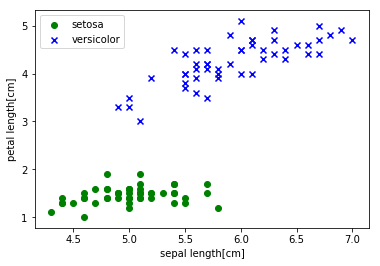

In [29]:
y = df.iloc[0:100, 4].values
y = np.where(y== 'Iris-setosa',-1,1)
X = df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0],X[:50,1],color='green',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()

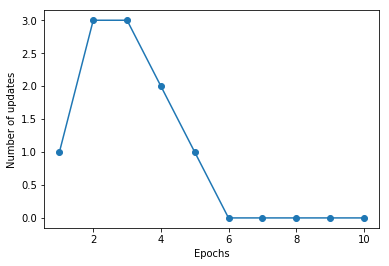

In [30]:
ppn = Perceptron(eta=0.1,n_iter=10)
ppn=ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [63]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y, classifier, resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap= ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max=X[:,0].min() -1 , X[:,0].max()+1
    x2_min,x2_max=X[:,1].min() -1 , X[:,1].max()+1
#     print(X)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
#     print(xx1.shape)
#     print(xx2)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max()) 
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1,0],
                   y=X[y==c1,1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=c1,
                   edgecolor='black')

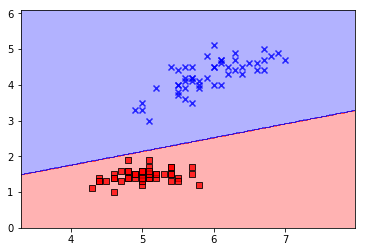

In [64]:
plot_decision_regions(X,y,classifier=ppn)
plt.show()

In [65]:
X[y==-1]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4],
       [ 5.4,  1.7],
       [ 4.6,  1.4],
       [ 5. ,  1.5],
       [ 4.4,  1.4],
       [ 4.9,  1.5],
       [ 5.4,  1.5],
       [ 4.8,  1.6],
       [ 4.8,  1.4],
       [ 4.3,  1.1],
       [ 5.8,  1.2],
       [ 5.7,  1.5],
       [ 5.4,  1.3],
       [ 5.1,  1.4],
       [ 5.7,  1.7],
       [ 5.1,  1.5],
       [ 5.4,  1.7],
       [ 5.1,  1.5],
       [ 4.6,  1. ],
       [ 5.1,  1.7],
       [ 4.8,  1.9],
       [ 5. ,  1.6],
       [ 5. ,  1.6],
       [ 5.2,  1.5],
       [ 5.2,  1.4],
       [ 4.7,  1.6],
       [ 4.8,  1.6],
       [ 5.4,  1.5],
       [ 5.2,  1.5],
       [ 5.5,  1.4],
       [ 4.9,  1.5],
       [ 5. ,  1.2],
       [ 5.5,  1.3],
       [ 4.9,  1.5],
       [ 4.4,  1.3],
       [ 5.1,  1.5],
       [ 5. ,  1.3],
       [ 4.5,  1.3],
       [ 4.4,  1.3],
       [ 5. ,  1.6],
       [ 5.1,  1.9],
       [ 4.8,  1.4],
       [ 5.1,  1.6],
       [ 4.6,

## Adaline

In [85]:
class AdalineGD(object):
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        rgen= np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1 + X.shape[1])
        self.cost_= []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors= (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]=self.eta * errors.sum()
            cost= (errors **2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def activation(self,net_input):
        return net_input
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= 0.0,1,-1)
    

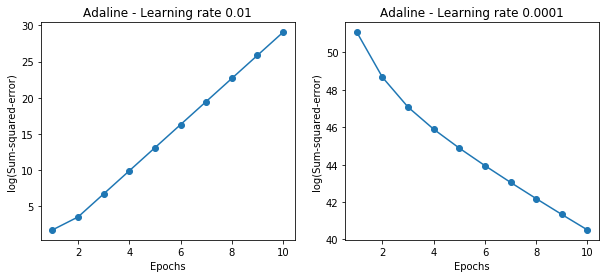

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
ada1= AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

### Feature Scaling - Standardization

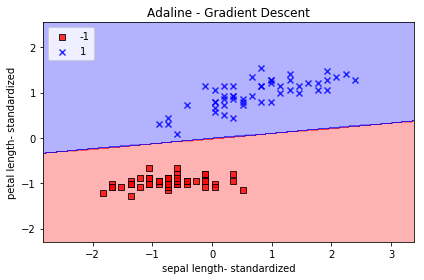

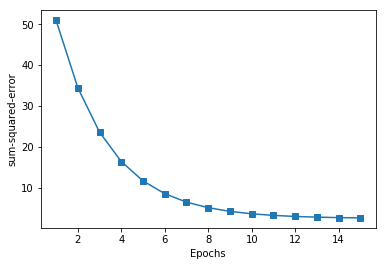

In [84]:
X_std = np.copy(X)
X_std[:,0]= (X[:,0]-X[:,0].mean())/ X[:,0].std()
X_std[:,1]= (X[:,1]-X[:,1].mean())/ X[:,1].std()

ada = AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length- standardized')
plt.ylabel('petal length- standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1,len(ada.cost_)+1), ada.cost_,marker='s')
plt.xlabel('Epochs')
plt.ylabel('sum-squared-error')
plt.show()

[[ 5.5  3.8]
 [ 5.4  4.5]
 [ 5.5  1.4]
 [ 5.5  3.7]
 [ 5.   3.3]
 [ 5.1  1.4]
 [ 5.5  1.3]
 [ 5.8  3.9]
 [ 5.6  3.9]
 [ 6.7  4.4]
 [ 5.8  4. ]
 [ 5.1  1.5]
 [ 6.3  4.7]
 [ 6.9  4.9]
 [ 6.4  4.5]
 [ 5.2  1.5]
 [ 5.4  1.5]
 [ 5.1  1.9]
 [ 6.   4.5]
 [ 5.4  1.5]
 [ 4.7  1.3]
 [ 6.1  4.7]
 [ 6.2  4.3]
 [ 6.   4. ]
 [ 5.1  1.5]
 [ 5.   1.2]
 [ 5.6  4.2]
 [ 5.2  1.5]
 [ 5.1  1.6]
 [ 4.4  1.3]
 [ 5.8  4.1]
 [ 5.7  4.1]
 [ 6.5  4.6]
 [ 5.7  4.2]
 [ 5.6  4.1]
 [ 5.   1.3]
 [ 5.3  1.5]
 [ 5.2  3.9]
 [ 5.1  1.7]
 [ 4.9  1.5]
 [ 6.7  4.7]
 [ 5.5  4. ]
 [ 6.7  5. ]
 [ 5.7  1.5]
 [ 6.   5.1]
 [ 4.5  1.3]
 [ 4.8  1.4]
 [ 6.1  4.6]
 [ 5.   1.6]
 [ 5.1  3. ]
 [ 5.   1.6]
 [ 5.7  4.5]
 [ 4.8  1.9]
 [ 5.   1.4]
 [ 6.6  4.6]
 [ 5.   1.4]
 [ 5.1  1.5]
 [ 6.3  4.4]
 [ 4.6  1.5]
 [ 6.4  4.3]
 [ 4.8  1.6]
 [ 5.6  4.5]
 [ 5.9  4.8]
 [ 4.4  1.3]
 [ 4.6  1.4]
 [ 5.5  4. ]
 [ 4.4  1.4]
 [ 5.   3.5]
 [ 5.1  1.4]
 [ 5.5  4.4]
 [ 4.9  3.3]
 [ 4.6  1. ]
 [ 5.9  4.2]
 [ 6.1  4.7]
 [ 5.   1.5]
 [ 5.7  4.2]
 [ 4.3  1.1]